In [4]:
import xarray as xr
from pyxpcm import pcm
import src.constants as cst

/home/users/sithom/sof-agu/env/lib/python3.8/site-packages/pyxpcm/plot.py:45: UserWarning: pyXpcm requires seaborn installed for full plotting functionality
  warnings.warn("pyXpcm requires seaborn installed for full plotting functionality")


In [3]:
print(pcm)

<class 'pyxpcm.models.pcm'>


In [5]:
cst.BSOSE_PATH

'/gws/nopw/j04/ai4er/users/sdat2/bsose_data/bsose_stuv'

In [6]:
salt = xr.open_dataset(cst.SALT_FILE)
print(salt)

<xarray.Dataset>
Dimensions:  (XC: 2160, YC: 588, Z: 52, time: 60)
Coordinates:
    iter     (time) int64 ...
  * time     (time) datetime64[ns] 2008-01-31T10:24:00 ... 2012-12-31
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
  * YC       (YC) float32 -77.98 -77.95 -77.91 -77.88 ... -30.02 -29.87 -29.72
  * Z        (Z) float32 -2.1 -6.7 -12.15 -18.55 ... -5e+03 -5.4e+03 -5.8e+03
    Depth    (YC, XC) float32 ...
    rA       (YC, XC) float32 ...
    drF      (Z) float32 ...
    hFacC    (Z, YC, XC) float32 ...
Data variables:
    SALT     (time, Z, YC, XC) float32 ...


In [7]:
theta = xr.open_dataset(cst.THETA_FILE)
print(theta)

<xarray.Dataset>
Dimensions:  (XC: 2160, YC: 588, Z: 52, time: 60)
Coordinates:
    iter     (time) int64 ...
  * time     (time) datetime64[ns] 2008-01-31T10:24:00 ... 2012-12-31
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
  * YC       (YC) float32 -77.98 -77.95 -77.91 -77.88 ... -30.02 -29.87 -29.72
  * Z        (Z) float32 -2.1 -6.7 -12.15 -18.55 ... -5e+03 -5.4e+03 -5.8e+03
    Depth    (YC, XC) float32 ...
    rA       (YC, XC) float32 ...
    drF      (Z) float32 ...
    hFacC    (Z, YC, XC) float32 ...
Data variables:
    THETA    (time, Z, YC, XC) float32 ...


In [8]:
theta_sel = (
    theta.sel(Z=slice(-cst.MIN_DEPTH, -cst.MAX_DEPTH))
    .where(theta.coords[cst.DEPTH_NAME] > cst.MAX_DEPTH)
    .drop(cst.USELESS_LIST)
    .THETA.rename("ALL")
    .drop([cst.Z_COORD])
)
salt_sel = (
    salt.sel(Z=slice(-cst.MIN_DEPTH, -cst.MAX_DEPTH))
    .where(salt.coords[cst.DEPTH_NAME] > cst.MAX_DEPTH)
    .drop(cst.USELESS_LIST)
    .SALT.rename("ALL")
    .drop([cst.Z_COORD])
)

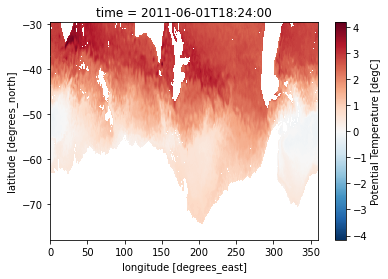

In [9]:
theta_sel.isel(time=cst.EXAMPLE_TIME_INDEX, Z=cst.EXAMPLE_Z_INDEX).plot.imshow()

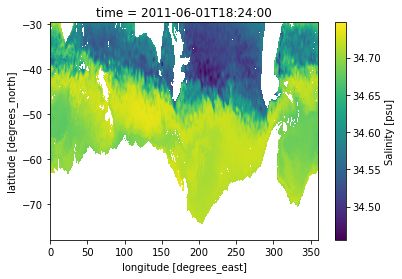

In [11]:
salt_sel.isel(time=cst.EXAMPLE_TIME_INDEX, Z=cst.EXAMPLE_Z_INDEX).plot.imshow()

In [13]:
xr_all = xr.concat([salt_sel, theta_sel], cst.Z_COORD)
xr_all = xr_all.assign_coords({cst.Z_COORD: (cst.Z_COORD, xr_all[cst.Z_COORD].values)})

In [24]:
print(xr_all)

<xarray.DataArray 'ALL' (time: 60, Z: 34, YC: 588, XC: 2160)>
array([[[[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [35.268375 , 35.26409  , 35.25704  , ..., 35.27357  ,
          35.273254 , 35.271984 ],
         [35.269543 , 35.270298 , 35.270508 , ..., 35.25641  ,
          35.261433 , 35.266228 ],
         [35.267864 , 35.27093  , 35.273327 , ..., 35.25193  ,
          35.256367 , 35.261852 ]],

        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
...
         [ 2.8248577,  2.8272774,  2

In [57]:
from pyxpcm import pcm

In [25]:
pcm_object = pcm(
        K=cst.K_CLUSTERS,
        features={cst.ALL_NAME: xr_all[cst.Z_COORD].values},
        # separate_pca=separate_pca,
        maxvar=cst.D_PCS,
        timeit=True,
        timeit_verb=1,
    )

In [30]:
pcm_object.fit(
    xr_all.to_dataset().isel(
        time=slice(cst.EXAMPLE_TIME_INDEX, cst.EXAMPLE_TIME_INDEX + 2)
    ),
    features={cst.ALL_NAME: cst.ALL_NAME},
    dim=cst.Z_COORD,
)

AttributeError: module 'src.constants' has no attribute 'ALL_NAME'

In [29]:
print(xr_all)

<xarray.DataArray 'ALL' (time: 60, Z: 34, YC: 588, XC: 2160)>
array([[[[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         ...,
         [35.268375 , 35.26409  , 35.25704  , ..., 35.27357  ,
          35.273254 , 35.271984 ],
         [35.269543 , 35.270298 , 35.270508 , ..., 35.25641  ,
          35.261433 , 35.266228 ],
         [35.267864 , 35.27093  , 35.273327 , ..., 35.25193  ,
          35.256367 , 35.261852 ]],

        [[       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
         [       nan,        nan,        nan, ...,        nan,
                 nan,        nan],
...
         [ 2.8248577,  2.8272774,  2